<a href="https://colab.research.google.com/github/Giuseppe31-s/Macroeconomia/blob/main/Curva_de_phillips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/Giuseppe31-s/Macroeconomia/main/dados/dados_desemprego.csv"
url1 = 'https://raw.githubusercontent.com/Giuseppe31-s/Macroeconomia/main/dados/ipca_15_2000.csv'
taxa_desemprego = pd.read_csv(url,sep = ';',decimal = ',')
ipca_15 = pd.read_csv(url1,sep = ';',decimal=',')

In [3]:
taxa_desemprego.head()

,Trimestre Móvel,%
0,jan-fev-mar 2012,7.9
1,fev-mar-abr 2012,7.7
2,mar-abr-mai 2012,7.6
3,abr-mai-jun 2012,7.5
4,mai-jun-jul 2012,7.4


In [4]:
ipca_15.head()

,Mês,IPCA-15
0,01-05-00,6.57
1,01-06-00,6.68
2,01-07-00,6.67
3,01-08-00,7.92
4,01-09-00,7.90


In [5]:
ipca_15['Mês']=pd.to_datetime(ipca_15['Mês'], format='%d-%m-%y')
ipca_15.rename(columns={'Mês':'data'},inplace= True)
ipca_15.tail(2)

,data,IPCA-15
250,2021-03-01,5.52
251,2021-04-01,6.17


In [6]:
ipca_15.head(2)

,data,IPCA-15
0,2000-05-01,6.57
1,2000-06-01,6.68


In [7]:
taxa_desemprego['Trimestre Móvel'] = pd.date_range(start = '02/01/2012', periods=len(taxa_desemprego), freq='M')
taxa_desemprego.rename(columns={'%':'taxa_desemprego','Trimestre Móvel':'data'},inplace=True)
taxa_desemprego.head()

,data,taxa_desemprego
0,2012-02-29,7.9
1,2012-03-31,7.7
2,2012-04-30,7.6
3,2012-05-31,7.5
4,2012-06-30,7.4


In [8]:
taxa_desemprego.head()

,data,taxa_desemprego
0,2012-02-29,7.9
1,2012-03-31,7.7
2,2012-04-30,7.6
3,2012-05-31,7.5
4,2012-06-30,7.4


In [9]:
ipca =ipca_15.query('data>= "2012-01-01" and data<= "2020-12-01"')
ipca = ipca.reset_index()
ipca.drop(columns='index',inplace=True)


In [10]:
ipca['taxa desempregados'] = taxa_desemprego.taxa_desemprego
ipca.head()

,data,IPCA-15,taxa desempregados
0,2012-01-01,6.44,7.9
1,2012-02-01,5.98,7.7
2,2012-03-01,5.61,7.6
3,2012-04-01,5.25,7.5
4,2012-05-01,5.05,7.4


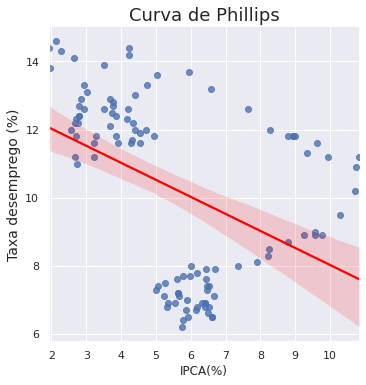

In [11]:
sns.set()
ax = sns.lmplot(data = ipca, x= 'IPCA-15', y = 'taxa desempregados',line_kws={'color':'red'})
ax.set_ylabels('Taxa desemprego (%)', fontsize=14)
ax.set_xlabels('IPCA(%)',14)
plt.title('Curva de Phillips', fontsize = 18);


###Curva de Phillips aceleracionista

In [13]:
ipca_ajustado = ipca['IPCA-15']/ipca['IPCA-15'].shift(12)-1

In [14]:
ipca['IPCA_AJ'] = ipca_ajustado

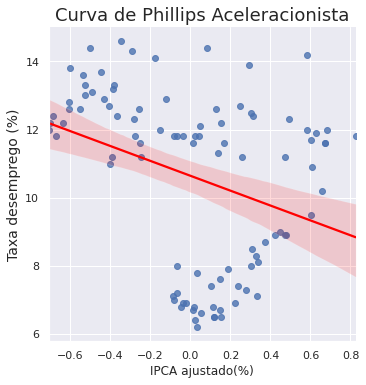

In [18]:
sns.set()
ax = sns.lmplot(data=ipca,x= 'IPCA_AJ' , y = 'taxa desempregados',line_kws={'color':'red'})
ax.set_ylabels('Taxa desemprego (%)', fontsize=14)
ax.set_xlabels('IPCA ajustado(%)',14)
plt.title('Curva de Phillips Aceleracionista', fontsize = 18);